<h1>Linear Regression</h1>
<p>This notebook provides an example code of analyzing <b>Consumer confidence index</b> for customers of a specific bank using linear regression. The dependent variable which we will use in OLS model is <b>Consumer confidence index</b>. We would like to understand what variables have significant relationship with consumers' confidence.
    
The general sequence of steps that we will follow is the following:
<ol>
<li>Describing the data (checking for NAs, outliers,summary statistics of our variables, etc)
<li>Do statistical testing (<b>T-test</b>) if needed
<li>Checking for correlations between the variables, and drop one of correlated variables 
<li>Visualize the relationship between dependent variable (consumer conf. index) and some of variables which are highly correlated to consumer conf. index
<li>Construct the OLS model using statsmodel package
<li>Get summary of the model
<li>Interpret the results
</ol>
</p>

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.formula.api import ols #for linear regression
import seaborn as sns #for heatmap
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.api import qqplot
from statsmodels.stats.diagnostic import het_breuschpagan #for Breusch-Pagan test test
from statsmodels.formula.api import ols #for linear regression
import seaborn as sns #for heatmap
from scipy import stats
from statsmodels.stats.diagnostic import linear_rainbow #linearity test
from scipy.stats import shapiro #for checking normality
from statsmodels.stats.outliers_influence import variance_inflation_factor #for checking Multicolinearity

In [2]:
#read the data
data=pd.read_excel("housing_data.xlsx")

<h1>Description of data</h1>

In [3]:
#lets see how the data looks 
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Ascot Vale,3/8 Walter St,2,t,865000,SP,Nelson,18/03/2017,5.9,3032,...,2,1,146,132.0,2015,Moonee Valley City Council,-37.7713,144.9038,Western Metropolitan,6567
1,Ascot Vale,12/9 Milton St,2,u,442000,S,Alexkarbon,18/06/2016,5.9,3032,...,1,1,0,62.0,1975,Moonee Valley City Council,-37.7733,144.9219,Western Metropolitan,6567
2,Ascot Vale,21A Geddes St,3,h,1037500,S,Alexkarbon,19/11/2016,5.9,3032,...,1,2,506,110.0,1920,Moonee Valley City Council,-37.7779,144.9133,Western Metropolitan,6567
3,Ascot Vale,1/20 Newsom St,3,t,1050000,S,Jellis,19/11/2016,5.9,3032,...,2,2,318,160.0,2013,Moonee Valley City Council,-37.7744,144.9035,Western Metropolitan,6567
4,Ascot Vale,4/27 Roseberry St,2,u,440000,S,McDonald,19/11/2016,5.9,3032,...,1,1,0,65.0,1970,Moonee Valley City Council,-37.7749,144.9137,Western Metropolitan,6567


In [4]:
#let's check for NA's
data.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [5]:
#let's get info about all the variables and the types of them
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 21 columns):
Suburb           110 non-null object
Address          110 non-null object
Rooms            110 non-null int64
Type             110 non-null object
Price            110 non-null int64
Method           110 non-null object
SellerG          110 non-null object
Date             110 non-null object
Distance         110 non-null float64
Postcode         110 non-null int64
Bedroom2         110 non-null int64
Bathroom         110 non-null int64
Car              110 non-null int64
Landsize         110 non-null int64
BuildingArea     110 non-null float64
YearBuilt        110 non-null int64
CouncilArea      110 non-null object
Lattitude        110 non-null float64
Longtitude       110 non-null float64
Regionname       110 non-null object
Propertycount    110 non-null int64
dtypes: float64(4), int64(9), object(8)
memory usage: 18.1+ KB


In [6]:
#Getting summary statistics of numeric variables
data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,110.000000,1.100000e+02,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000
mean,3.081818,1.011146e+06,10.210000,3083.490909,3.081818,1.672727,1.609091,488.327273,149.456818,1964.009091,-37.805117,144.963558,7644.827273
std,0.968606,5.049120e+05,6.508653,90.533561,1.023860,0.791110,0.919667,434.624738,79.724047,39.751636,0.076131,0.127405,4100.849961
min,1.000000,2.750000e+05,2.400000,3011.000000,1.000000,1.000000,0.000000,0.000000,35.000000,1890.000000,-38.099950,144.609770,962.000000
25%,3.000000,6.888750e+05,5.200000,3032.000000,2.250000,1.000000,1.000000,208.500000,101.750000,1930.000000,-37.861365,144.908150,5164.500000
50%,3.000000,9.435000e+05,6.400000,3056.000000,3.000000,2.000000,2.000000,450.500000,139.000000,1970.000000,-37.778100,144.958350,6567.000000
75%,4.000000,1.272000e+06,14.000000,3132.500000,4.000000,2.000000,2.000000,639.500000,175.750000,2004.000000,-37.772800,145.023403,10579.000000
max,8.000000,2.950000e+06,35.400000,3752.000000,9.000000,7.000000,4.000000,2905.000000,618.000000,2017.000000,-37.576810,145.299590,21650.000000


C:\Users\psargsyan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


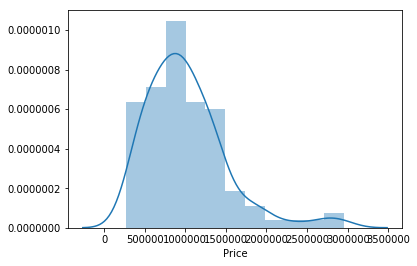

In [155]:
#for pdays the histogram has this shape as missing values were coded to very high number-999 for this case
#this is another approach of handling missing values in dataset
sns.distplot(data.Price)
plt.show()

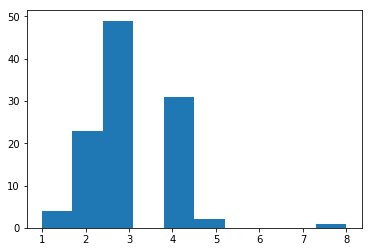

In [156]:
plt.hist(data.Rooms)
plt.show()

In [11]:
#let's see categories and number of observations in each category for object variables
for i in data.select_dtypes(include="object").columns:
    j=data[i].value_counts()
    print(i,"\n",j,"\n","\n")
    print("--------------------")

Suburb 
 Ascot Vale          25
Brunswick           16
Ashburton            8
Brunswick East       5
Point Cook           3
Werribee             2
Taylors Hill         2
Sunshine West        2
Brighton             2
Broadmeadows         2
Altona               2
Oakleigh South       2
Toorak               2
Wheelers Hill        2
Reservoir            2
Richmond             2
Yarraville           2
Boronia              2
Roxburgh Park        2
Bayswater North      1
Seaford              1
Brunswick West       1
Sunbury              1
Parkdale             1
South Morang         1
Blackburn North      1
Blackburn            1
Seddon               1
Thomastown           1
Nunawading           1
Surrey Hills         1
Preston              1
Seabrook             1
Vermont              1
Ringwood North       1
Brighton East        1
West Footscray       1
Wyndham Vale         1
Brooklyn             1
Balwyn               1
Aspendale            1
Avondale Heights     1
Ashwood              1
Al

In [12]:
data.drop(["Suburb","Address","SellerG","Date","CouncilArea",'Postcode'],axis=1,inplace=True)

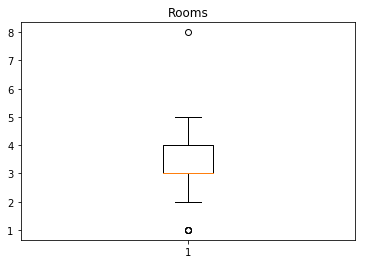

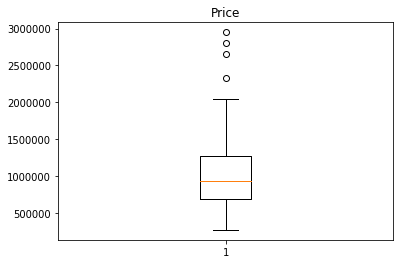

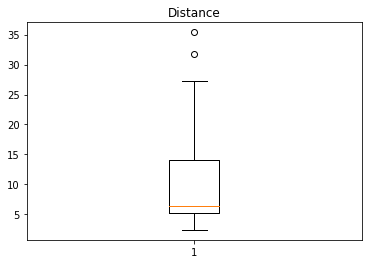

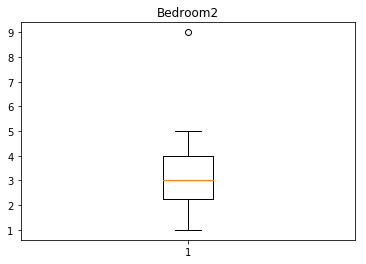

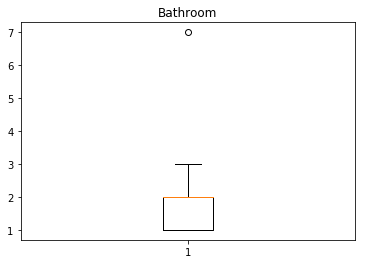

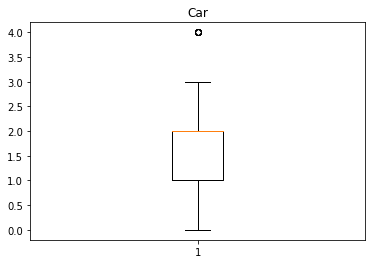

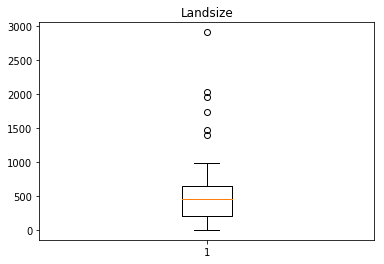

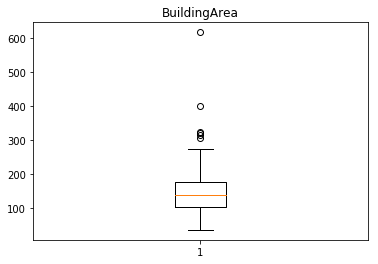

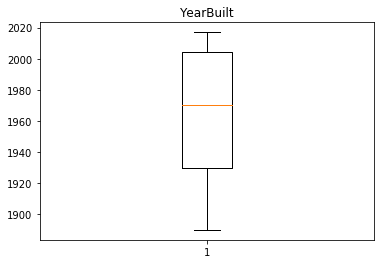

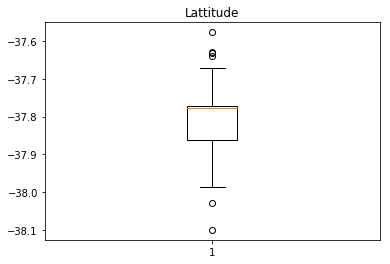

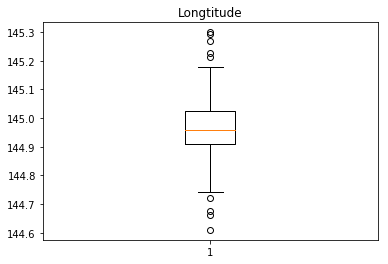

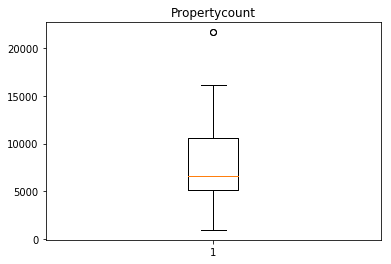

In [15]:
#observe outliers visually
for i in data.select_dtypes(exclude="object").columns:
  plt.boxplot(data[i])
  plt.title(i)
  plt.show()

In [16]:
#let's check variables with zero variance(i.e. we have same values for all observations), 
#if there is any we will not include in our further analysis
data.var()==0

Rooms            False
Price            False
Distance         False
Bedroom2         False
Bathroom         False
Car              False
Landsize         False
BuildingArea     False
YearBuilt        False
Lattitude        False
Longtitude       False
Propertycount    False
dtype: bool

# Checking for correlations

In [17]:
data.corr()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Rooms,1.000000,0.496441,0.322496,0.992288,0.693759,0.427596,0.289627,0.743288,0.171059,-0.134637,0.041580,-0.094804
Price,0.496441,1.000000,-0.141503,0.498843,0.570595,0.329081,0.041088,0.628836,-0.202424,-0.206153,0.320891,-0.134389
Distance,0.322496,-0.141503,1.000000,0.312113,0.133916,0.334017,0.244377,0.220520,0.308820,-0.262469,0.188707,-0.085765
Bedroom2,0.992288,0.498843,0.312113,1.000000,0.724278,0.433750,0.298613,0.753977,0.186398,-0.138682,0.050343,-0.097368
Bathroom,0.693759,0.570595,0.133916,0.724278,1.000000,0.427814,0.187223,0.765947,0.335585,-0.208506,0.108217,-0.175644
Car,0.427596,0.329081,0.334017,0.433750,0.427814,1.000000,0.311213,0.487816,0.317550,-0.141732,0.129748,-0.102099
Landsize,0.289627,0.041088,0.244377,0.298613,0.187223,0.311213,1.000000,0.284929,0.172289,0.011771,0.120962,-0.044187
BuildingArea,0.743288,0.628836,0.220520,0.753977,0.765947,0.487816,0.284929,1.000000,0.285590,-0.197247,0.144594,-0.150502
YearBuilt,0.171059,-0.202424,0.308820,0.186398,0.335585,0.317550,0.172289,0.285590,1.000000,-0.085505,-0.133707,-0.118076
Lattitude,-0.134637,-0.206153,-0.262469,-0.138682,-0.208506,-0.141732,0.011771,-0.197247,-0.085505,1.000000,-0.248674,0.149609


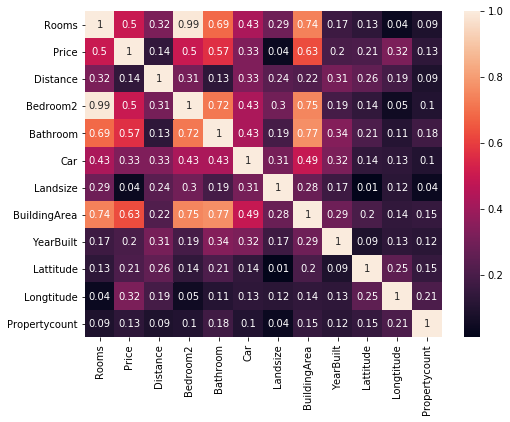

In [18]:
plt.figure(figsize=(8,6))
sns.heatmap(data.corr().abs().round(2), annot=True)
plt.show()

In [19]:
#let's one of the \highly correlated variables
data.drop("BuildingArea",axis=1,inplace=True)

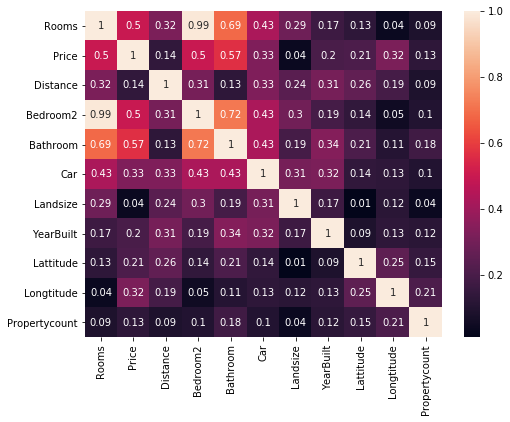

In [20]:
plt.figure(figsize=(8,6))
sns.heatmap(data.corr().abs().round(2), annot=True)
plt.show()

<b>Ater dropping "BuildingArea" we see that there is no correlation coefficient higher than 0.75 so won't exclude any other variable.</b>

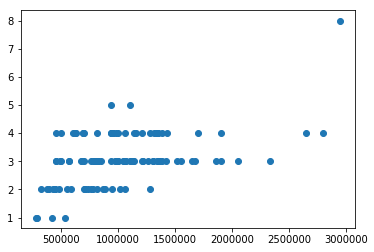

In [22]:
#let's visualize the relationship between price and number of rooms
plt.scatter(data.Price,data.Rooms)
plt.show()

# OLS Model

In [124]:
data=pd.get_dummies(data,drop_first=True)
data.head()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,YearBuilt,Lattitude,Longtitude,Propertycount,Type_t,Type_u,Method_S,Method_SP,Method_VB,Regionname_NorthernMetropolitan,Regionname_South-EasternMetropolitan,Regionname_SouthernMetropolitan,Regionname_WesternMetropolitan
0,2,865000,5.9,2,2,1,146,2015,-37.7713,144.9038,6567,1,0,0,1,0,0,0,0,1
1,2,442000,5.9,2,1,1,0,1975,-37.7733,144.9219,6567,0,1,1,0,0,0,0,0,1
2,3,1037500,5.9,3,1,2,506,1920,-37.7779,144.9133,6567,0,0,1,0,0,0,0,0,1
3,3,1050000,5.9,3,2,2,318,2013,-37.7744,144.9035,6567,1,0,1,0,0,0,0,0,1
4,2,440000,5.9,2,1,1,0,1970,-37.7749,144.9137,6567,0,1,1,0,0,0,0,0,1


In [127]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 20 columns):
Rooms                                   110 non-null int64
Price                                   110 non-null int64
Distance                                110 non-null float64
Bedroom2                                110 non-null int64
Bathroom                                110 non-null int64
Car                                     110 non-null int64
Landsize                                110 non-null int64
YearBuilt                               110 non-null int64
Lattitude                               110 non-null float64
Longtitude                              110 non-null float64
Propertycount                           110 non-null int64
Type_t                                  110 non-null uint8
Type_u                                  110 non-null uint8
Method_S                                110 non-null uint8
Method_SP                               110 non-null uint8
Meth

In [135]:
data.columns=data.columns.str.replace(" ","_")
data.columns=data.columns.str.replace("-","_")

In [136]:
var=data.columns.tolist()

In [137]:
var

['Rooms',
 'Price',
 'Distance',
 'Bedroom2',
 'Bathroom',
 'Car',
 'Landsize',
 'YearBuilt',
 'Lattitude',
 'Longtitude',
 'Propertycount',
 'Type_t',
 'Type_u',
 'Method_S',
 'Method_SP',
 'Method_VB',
 'Regionname_NorthernMetropolitan',
 'Regionname_South_EasternMetropolitan',
 'Regionname_SouthernMetropolitan',
 'Regionname_WesternMetropolitan']

In [138]:
var.remove("Price")

In [139]:
print(var)

['Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount', 'Type_t', 'Type_u', 'Method_S', 'Method_SP', 'Method_VB', 'Regionname_NorthernMetropolitan', 'Regionname_South_EasternMetropolitan', 'Regionname_SouthernMetropolitan', 'Regionname_WesternMetropolitan']


In [140]:
#as there are many variables, not to input all manually let's create formula 
formula="+".join(var)
formula='Price~'+formula
formula

'Price~Rooms+Distance+Bedroom2+Bathroom+Car+Landsize+YearBuilt+Lattitude+Longtitude+Propertycount+Type_t+Type_u+Method_S+Method_SP+Method_VB+Regionname_NorthernMetropolitan+Regionname_South_EasternMetropolitan+Regionname_SouthernMetropolitan+Regionname_WesternMetropolitan'

In [141]:
#first let's include all the explaining variables in the model(high correlated ones are already excluded)
model_ols1=ols(formula=formula, data=data)

In [142]:
#let's see the summary of the results now
#let's look at R-squared and p-values
results = model_ols1.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     19.58
Date:                Tue, 19 Feb 2019   Prob (F-statistic):           3.93e-24
Time:                        17:24:44   Log-Likelihood:                -1510.2
No. Observations:                 110   AIC:                             3060.
Df Residuals:                      90   BIC:                             3114.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                            -4.302e+07   8.49e+07     -0.507      0.613   -2.12e+08    1.26e+08
Rooms                                 3.356e+05   2.19e+05      1.531      0.129   -9.98e+04    7.71e+05
Distance                             -3.733e+04   6731.346     -5.545      0.000   -5.07e+04    -2.4e+04
Bedroom2                             -2.268e+05   2.13e+05     -1.065      0.290    -6.5e+05    1.96e+05
Bathroom                              1.633e+05   5.84e+04      2.798      0.006    4.74e+04    2.79e+05
Car                                   9.147e+04    3.2e+04      2.857      0.005    2.79e+04    1.55e+05
Landsize                                22.0318     66.268      0.332      0.740    -109.622     153.685
YearBuilt                            -2103.2052    842.892     -2.495      0.014   -3777.757    -428.654
Lattitude                             5.721e+05   5.58e+05      1.024      0.308   -5.37e+05    1.68e+06
Longtitude                            4.779e+05    5.2e+05      0.919      0.361   -5.56e+05    1.51e+06
Propertycount                            8.6507      7.315      1.183      0.240      -5.882      23.183
Type_t                               -9.305e+04   1.08e+05     -0.863      0.391   -3.07e+05    1.21e+05
Type_u                               -3.523e+05   8.99e+04     -3.920      0.000   -5.31e+05   -1.74e+05
Method_S                              2.344e+05   7.86e+04      2.981      0.004    7.82e+04    3.91e+05
Method_SP                             3.762e+05   1.05e+05      3.587      0.001    1.68e+05    5.84e+05
Method_VB                              3.47e+05   1.32e+05      2.638      0.010    8.56e+04    6.08e+05
Regionname_NorthernMetropolitan      -2.765e+05   2.23e+05     -1.237      0.219    -7.2e+05    1.67e+05
Regionname_South_EasternMetropolitan  1.924e+05   1.54e+05      1.251      0.214   -1.13e+05    4.98e+05
Regionname_SouthernMetropolitan       4.922e+05   1.65e+05      2.980      0.004    1.64e+05     8.2e+05
Regionname_WesternMetropolitan       -2.117e+05   2.51e+05     -0.843      0.401    -7.1e+05    2.87e+05
==============================================================================
Omnibus:                        7.067   Durbin-Watson:                   2.245
Prob(Omnibus):                  0.029   Jarque-Bera (JB):                7.602
Skew:                           0.414   Prob(JB):                       0.0224
Kurtosis:                       3.987   Cond. No.                     3.21e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.21e+07. This might indicate that there are
strong mult

# Model diagnostics

# Cecking for Linearity and Equal variance

In [143]:
#residuals of the model
residuals=results.resid
pred_values=results.predict()

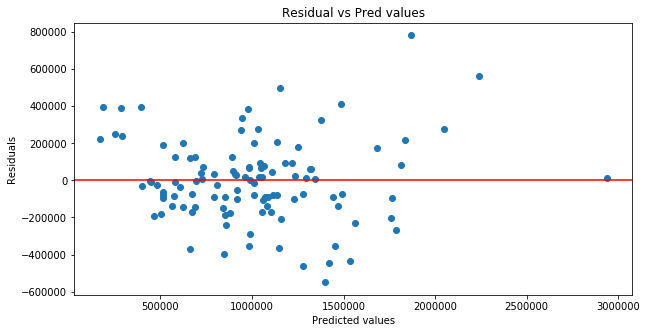

In [144]:
#lets plot predicted values vs residuals
plt.figure(figsize=(10,5))
plt.scatter(pred_values,residuals)
plt.axhline(y=0, c="red")
plt.title("Residual vs Pred values")
plt.ylabel("Residuals")
plt.xlabel("Predicted values")
plt.show()

In [145]:
linear_rainbow(results)

(1.1670943623916252, 0.31681097225732885)

In [146]:
#Breusch-Pagan test for homoscedasticity
#The null hypothesis assumes homoskedasticity
#p-value<=0.05 shows that there is violation of homoscedasticity
het_breuschpagan(residuals,model_ols1.exog)

(27.00945930370873,
 0.10443293113511168,
 1.5416159841445245,
 0.0903189590491281)

# Normality

C:\Users\psargsyan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


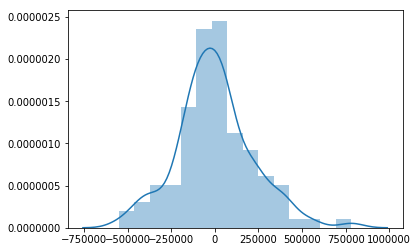

In [147]:
sns.distplot(residuals)
plt.show()

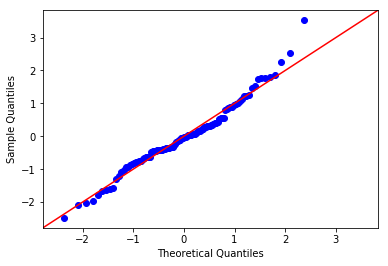

In [148]:
#QQ plot
qqplot(residuals,fit=True, line='45')
plt.show()

In [149]:
shapiro(residuals)

(0.9775564074516296, 0.0601578913629055)

# Multicollinearity

In [150]:
vif = [variance_inflation_factor(data[var].values, i) for i in range(0,len(var))]
print(vif)

[915.955759068321, 9.328826619462065, 872.0165536158098, 20.395320130111408, 6.419482247932136, 3.2692557868606067, 4902.514170087078, 588566.047168176, 575941.4219239374, 7.339475427070338, 1.7344776702486, 2.6433600308612197, 7.661792839757636, 2.738658458749274, 1.7120146282823223, 8.932626289898996, 2.7542341025179455, 4.256634862603488, 9.813638035710248]


In [151]:
for i in range(0,len(var)):
    print(var[i],":",vif[i])

Rooms : 915.955759068321
Distance : 9.328826619462065
Bedroom2 : 872.0165536158098
Bathroom : 20.395320130111408
Car : 6.419482247932136
Landsize : 3.2692557868606067
YearBuilt : 4902.514170087078
Lattitude : 588566.047168176
Longtitude : 575941.4219239374
Propertycount : 7.339475427070338
Type_t : 1.7344776702486
Type_u : 2.6433600308612197
Method_S : 7.661792839757636
Method_SP : 2.738658458749274
Method_VB : 1.7120146282823223
Regionname_NorthernMetropolitan : 8.932626289898996
Regionname_South_EasternMetropolitan : 2.7542341025179455
Regionname_SouthernMetropolitan : 4.256634862603488
Regionname_WesternMetropolitan : 9.813638035710248


#  Identifying Influential Data Points: Cook's distance

In [152]:
infl=results.get_influence()
ck_d=infl.summary_frame().filter(["cooks_d"])

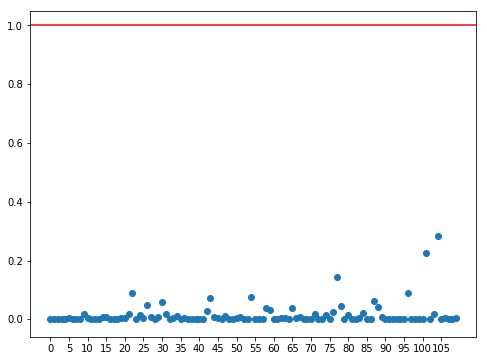

In [154]:
plt.figure(figsize=(8,6))
plt.scatter(ck_d.index,ck_d)
plt.axhline(y=1,c="red")
plt.xticks(np.arange(min(ck_d.index), max(ck_d.index)+1,5))
plt.show()